In [173]:
import numpy as np
import matplotlib.pyplot as plt


In [174]:
# Read thermal history data
redshift_digitizer, temperature_digitizer = np.loadtxt('./thermal_history.csv', delimiter=', ', unpack=True)

In [175]:
# define constants
gamma = 5/3         # adiabatic constant for ideal monatomic gas
mu = 1.22           # mean molecular weight including a helium mass fraction 0.24
k_B = 1.380649E-23  # boltzmann constant in m^2 kg s^-2 K^-1
m_H = 1.66E-27      # mass of hydrogen atom in kg

In [176]:
# define functions for calculation


In [177]:
# define the data point of plot
redshift = np.logspace(0, 3, 3000)
temperature = np.interp(redshift, redshift_digitizer, temperature_digitizer)
sound_speed = np.sqrt(gamma*k_B*temperature/mu/m_H) / 1000
relative_speed = np.piecewise(redshift, [redshift >= 20, redshift < 20], [lambda z: 30/1000*(1+z), lambda z: 620*(1+z)**-2.3])
effective_velocity = np.sqrt(sound_speed*relative_speed)

<Figure size 432x288 with 0 Axes>

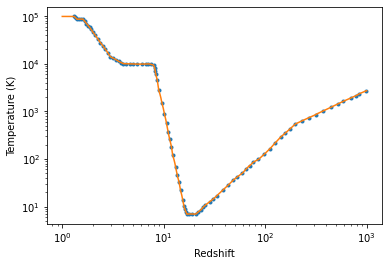

In [178]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_yscale('log')
axes.set_xscale('log')
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'Temperature (K)')
# thermal history data points from digitizer
axes.plot(redshift_digitizer, temperature_digitizer, '.')
axes.plot(redshift, temperature)



<Figure size 432x288 with 0 Axes>

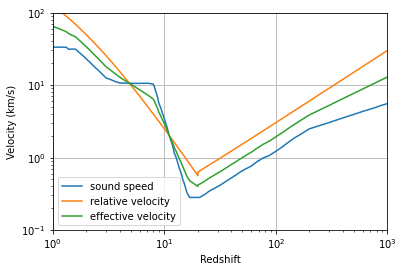

In [180]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_yscale('log')
axes.set_ylim([0.1, 100])
axes.set_xscale('log')
axes.set_xlim([1, 1000])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'Velocity (km/s)')

# effective velocity plot
axes.plot(redshift, sound_speed, label='sound speed')
axes.plot(redshift, relative_speed, label='relative velocity')
axes.plot(redshift, effective_velocity, label='effective velocity')
axes.plot

axes.grid()
axes.legend()